# Gradient Descent

# 1. Importing all necessary packages

In [ ]:
import pandas as pd                                     # importing pandas to handle dataset
import numpy as np                                      # imporitng numpy to do mathematical computations
import matplotlib.pyplot as plt                         # importing pyplot to plot graphs

from sklearn import preprocessing                       # importing preprocessing to scale our data
from sklearn.datasets import load_boston                # importing boston dataset
from sklearn.linear_model import LinearRegression       # imporitng LinearRegression to compare with our own GD
from sklearn.metrics import mean_squared_error          # importig mean squared error to calculate the error
from sklearn.model_selection import train_test_split    # imporitng train test split to split dataset into train and test

import warnings
warnings.filterwarnings("ignore")                       # supressing warnings

# 2. Loading Boston dataset as X and Y 

In [ ]:
# Visualizing boston dataset as dataframe
boston_df = pd.DataFrame(data = load_boston().data)
boston_df.columns = load_boston().feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Dataset description

In [ ]:
print(load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = load_boston().data      # loading all the independent variables
Y = load_boston().target    # loading tagret variable
X[:5,]                      # First 5 rows of boston dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

# 3. Train and Test Split (70-30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=100)

#4. Preprocessing data

In [ ]:
# Standardizing Data
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Buidling Linear Regression model from sklearn LinearRegression

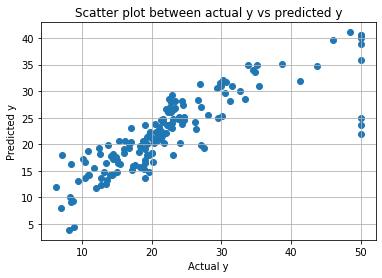

Mean Squared Error : 29.79884430147882
22.602259887005644
[-0.60033443  0.91337983 -0.04123957  0.67387317 -1.52448856  2.76096722
 -0.34091223 -2.81997448  2.45481024 -2.36183297 -1.94244355  0.95375187
 -3.22519325]


In [ ]:
# Linear Regression
clf = LinearRegression()
clf.fit(X_train, y_train)
plt.scatter(y_test,clf.predict(X_test))
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot between actual y vs predicted y')
plt.show()
sgd_constant = mean_squared_error(y_test, clf.predict(X_test))
print('Mean Squared Error :',sgd_constant)
print(clf.intercept_)
print(clf.coef_)

# 6. Pre-requisite to understand GD before moving to code

##6.1 Steps to find optimal coeff (Theory)
1. Define a cost function
\begin{equation}
J(\beta_0,\beta_1, \beta_2) = \frac{1}{2m}\sum_{i=1}^{m} \left(h_{\beta}(x^{(i)})-y^{(i)}\right)^2
\end{equation}
Here, **m** is the number of training examples. To make the math a little bit easier, we put a factor of **1/2m**. Our aim to minimise the cost function
\begin{equation} min_{\beta_0,\beta_1, \beta_2} \frac{1}{2m}\sum_{i=1}^{m} \left(h_{\beta}(x^{(i)})-y^{(i)}\right)^2 \end{equation}

2. Gradient descent is an algorithm that is used to minimize a function. Gradient descent is used not only in linear regression; it is a more general algorithm. All it needs a function which can be differentiable. Our cost function can be differentiable and the derivative of cost function can be given as:
$
\begin{equation}
\frac{\partial}{\partial\beta_0}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\beta_0x_0^{(i)}+\beta_1x_1^{(i)} + \beta_2x_2^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\beta_0x_0^{(i)}+\beta_1x_1^{(i)} + \beta_2x_2^{(i)} -y^{(i)}\right) .x_0^{(i)} = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\beta}(x^{(i)})-y^{(i)}\right).x_0^{(i)}\end{equation}
$
here $x_0$ is 1 since it's a constant

\begin{equation}
\frac{\partial}{\partial\beta_1}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\beta_0x_0^{(i)}+\beta_1x_1^{(i)} + \beta_2x_2^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\beta_0x_0^{(i)}+\beta_1x_1^{(i)} + \beta_2x_2^{(i)} -y^{(i)}\right).x_1^{(i)} = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\beta}(x^{(i)})-y^{(i)}\right).x_1^{(i)}\end{equation}

\begin{equation}
\frac{\partial}{\partial\beta_2}\left(\frac{1}{2m}\sum_{i=1}^{m} \left(\beta_0x_0^{(i)}+\beta_1x_1^{(i)} + \beta_2x_2^{(i)}-y^{(i)}\right)^2 \right) = \frac{1}{m}\sum_{i=1}^{m} \left(\beta_0x_0^{(i)}+\beta_1x_1^{(i)} + \beta_2x_2^{(i)} -y^{(i)}\right).x_2^{(i)} = \frac{1}{m}\sum_{i=1}^{m} \left(h_{\beta}(x^{(i)})-y^{(i)}\right).x_2^{(i)}\end{equation}


**Gradient Descent formula given by:**
\begin{equation}
\beta_j:=\beta_j-\alpha\frac{\partial}{\partial\beta_j}J(\beta_0,\beta_1,\beta_2)\mbox{ for j=0,1,2}
\end{equation}

**Now, we plug in the derivatives in gradient descent formula and we get:**
\begin{equation} \text{repeat until convergence:}\ \lbrace\\
 \beta_0 := \beta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\\
\beta_1 := \beta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)}\\
\beta_2 := \beta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)}
\\ \rbrace \end{equation}


In other words:
\begin{equation} \text{repeat until convergence:} \ \lbrace \\ \beta_j := \beta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}\ \ \ \ \text{for j := 0,1,2}\\ \rbrace\end{equation}

## 6.2 Practical approach

Suppose we have X, Y and beta matrices. 
X is features matrix of size 4 rows and 2 columns. We will add 1 as constant to make gradient descent steps simpler, Y (target) is column vector of size 4 rows and 1 column and beta (coeff) is column vector of size 3 rows and 1 column.
$\bar{Y}$ is predicted Y

\begin{equation}
 \begin{bmatrix} 1 & X_{01} & X_{02}\\ 1 & X_{11} & X_{12} \\ 1 & X_{21} & X_{22} \\ 1 & X_{31} & X_{32} \end{bmatrix} 
  \begin{bmatrix}
   \beta_0 \\
   \beta_1 \\
   \beta_2
   \end{bmatrix}
 =
  \begin{bmatrix}
   1.\beta_0 + X_{01}.\beta_1+ X_{02}.\beta_2 \\
   1.\beta_0 + X_{11}.\beta_1+ X_{12}.\beta_2 \\
   1.\beta_0 + X_{21}.\beta_1+ X_{22}.\beta_2 \\
   1.\beta_0 + X_{31}.\beta_1+ X_{32}.\beta_2
   \end{bmatrix}
  =
  \begin{bmatrix}
   \bar{Y_0} \\
   \bar{Y_1} \\
   \bar{Y_2} \\
   \bar{Y_3}
   \end{bmatrix}
\end{equation}

If we look at the middle matrix, we can observe that each row is having an equation of the line which will be ufrther used in cost function to minimize the cost through Gradient Descent Algorithm and at the end we will be having optimal betas which minimizes the cost.

Now, let's look at how we can minimize this using gradient descent.
\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \beta_j := \beta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)} \; & \text{for j := 0,1,2}\newline \rbrace\end{align*}

Here, lets take look at this term 
Now, let's look at how we can minimize this using gradient descent.
\begin{align*}& \text{error (predicted - actual):} \;
(h_\beta(x^{(i)}) - y^{(i)}) 
\newline \end{align*}

In matrix form
\begin{equation}
error =
 \begin{bmatrix}
   \bar{Y_0} \\
   \bar{Y_1} \\
   \bar{Y_2} \\
   \bar{Y_3}
   \end{bmatrix}
  -
  \begin{bmatrix}
   Y_0 \\
   Y_1 \\
   Y_2 \\
   Y_3
   \end{bmatrix}
   =
   \begin{bmatrix}
   error_0 \\
   error_1 \\
   error_2 \\
   error_3
   \end{bmatrix}
\end{equation}
we can rewrite the equation as:
\begin{equation} \text{repeat until convergence:} \ \lbrace \\ \beta_j := \beta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (error_j^{(i)}) \cdot x_j^{(i)}\ \ \ \ \text{for j := 0,1,2}\\ \rbrace\end{equation}

Now, lets take a look at summation and multuplication of x with error term:
\begin{equation}\alpha \frac{1}{m} \sum\limits_{i=1}^{m} (error_j^{(i)}) \cdot x_j^{(i)} \ \ \ \text{for j := 0,1,2}\end{equation}

In matrix form:
\begin{equation}
 \frac{\alpha}{m}
   \begin{bmatrix}
   error_0 \\
   error_1 \\
   error_2 \\
   error_3
   \end{bmatrix}
   .
  \begin{bmatrix} 1 & X_{01} & X_{02}\\ 1 & X_{11} & X_{12} \\ 1 & X_{21} & X_{22} \\ 1 & X_{31} & X_{32} \end{bmatrix} 
\end{equation}
This multiplcation can not be directly done, because of mismatch in rows and columns of matrices. We will have to transpose the X matrix so that we can get shape as of beta i.e 3 rows and 1 column.
\begin{equation}
\frac{\alpha}{m}
\begin{bmatrix} 
1 & 1 & 1 & 1\\
X_{01} & X_{11} & X_{21} & X_{31}\\ 
X_{02} & X_{12} & X_{22} & X_{32}
\end{bmatrix}
.
\begin{bmatrix}
   error_0 \\
   error_1 \\
   error_2 \\
   error_3
   \end{bmatrix}
   =
     \begin{bmatrix}
     (1.error_0 + 1.error_1 +1.error_2 + 1.error_3)\frac{\alpha}{m}\\
     (X_{01}.error_0 + X_{11}.error_1 +X_{21}.error_2 + X_{31}.error_3)\frac{\alpha}{m}\\
     (X_{02}.error_0 + X_{12}.error_1 +X_{22}.error_2 + X_{32}.error_3)\frac{\alpha}{m}
   \end{bmatrix}
   = 
     \begin{bmatrix}
   \beta_{grad0} \\
   \beta_{grad1} \\
   \beta_{grad2}
   \end{bmatrix}
\end{equation}
<br>
$\begin{bmatrix}
   \beta_{grad0} \\
   \beta_{grad1} \\
   \beta_{grad2}
   \end{bmatrix}$ are derivative betas which will get subracted from old betas to get new betas.

Now, lets take a look at final forumla
\begin{equation} \text{repeat until convergence:} \ \lbrace \\ \beta_j := \beta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\beta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}\ \ \ \ \text{for j := 0,1,2}\\ \rbrace\end{equation}

In matrix form:
\begin{equation}
\begin{bmatrix}
   \beta_{new0} \\
   \beta_{new1} \\
   \beta_{new2}
   \end{bmatrix}
  =
  \begin{bmatrix}
   \beta_{old0} \\
   \beta_{old1} \\
   \beta_{old2}
   \end{bmatrix}
   -
     \begin{bmatrix}
   \beta_{grad0} \\
   \beta_{grad1} \\
   \beta_{grad2}
   \end{bmatrix}
\end{equation}

After convergence we get last new betas as final beta which is given as $\begin{bmatrix}
   \beta_0 \\
   \beta_1 \\
   \beta_2
   \end{bmatrix}$.

These betas can be used to predict the outcome on test dataset.


#7. Building our own Linear_regression class

In [ ]:
class Linear_Regression():
    def __init__(self): 
        self.beta = 0
        self.allcost = 0

    def cost(self,X,y, beta):     
        '''
        Calculates the cost for given X and y. 
        Parameters:
            X  (numpy matrix): It's a matrix of m samples and n independent variables
            y  (numpy column vector):  Actual y
            beta (numpy column vector): It contains weights/coeff of each independent variables
        Returns:
            cost (float): Calculated cost from the error
        '''
        m = len(y)
        y_pred = X.dot(beta)
        cost = (1/(2*m)) * np.sum(np.square(y_pred - y)) # (1/m) * [sum from i = 0  to m (Y_pred_i - y_i)^2]
        return cost

    def fit(self, X, y, alpha, eps=1e-08, max_iter=10000, cost=0):
        '''
        Gradient descent alogrithm to optimize the beta coefficeints for which cost is minimum.
        Parameters:
            X (numpy matrix): It's a matrix of m samples and n independent variables
            y  (numpy column vector):  Actual y
            alpha (float): learning rate
            eps (float): epsilon (smallest value to compare the change in cost)
            max_iter (int): Maximum number of iterations
            cost (float): Initial cost
        '''

        X = np.insert(X, 0, 1, axis=1)      # Inserting 1 as constant for beta0; X -> (152,14) [1 constant and 13 variables]
        y = y.reshape(-1,1)                 # y -> (152,1) actual ys
        m = X.shape[0]                      # number of samples
        all_cost = []                       # To store cost in each iteration

        # Initializing beta to zeros
        beta = np.zeros((X.shape[1], 1)) # beta -> (14,1)


        # Iterate Loop
        for iter in range(max_iter):

            old_cost = cost                 # Updating old cost to newer one
            
            # Predicting y
            # X -> (152,14) and beta -> (14,1). 
            # Number of columns of 1st matrix matches rows of 2nd matrix. No transpose needed.
            y_pred = X.dot(beta) # y_pred -> (152,1); beta_0 * x_0 + beta_1 * x_1 + ....+ beta_14 * x_14

            # Computing gradient/derivative (d_j(beta)/d_beta)
            # y_pred -> (152,1), y -> (152,1) --------> (y_pred - y) -> (152,1)
            # X -> (152,14), (y_pred - y) -> (152,1). Matrix muliplication can't be done, because of rows column mismatch.
            # X.T -> (14,152), (y_pred - y) -> error -> (152,1). After transpose of X, column of X matches with rows of (y_pred - y).
            error = y_pred - y
            derivative = (1.0/m) * X.T.dot(error)          # derivative -> (14,1)

            # Updating beta 
            # beta -> (14,1), derivative -> (14,1), alpha*derivative -> (14,1)
            beta = beta - alpha * derivative                    # beta -> (14,1). 
            # At the end we get beta as column vector with 14 beta values corresponding to each independent variable.

            # Cost J(beta)
            cost = self.cost(X, y, beta)                         # Calculating cost
        
            all_cost.append(cost) # Capturing cost for each iteration

            # If difference in old and new cost matches the given eps, breaking from the loop
            if abs(old_cost-cost) <= eps:
                print('Converged, iterations: ', iter, '!!!')
                break

        else:
            print('Max interactions exceeded!') # Executes when GD does not find the local/global minimum

        self.beta = beta; self.allcost = all_cost

    def predict(self, X):
        '''
        Predicts the outcome from given X.
        Parameters:
            X (numpy matrix): It's a matrix of m samples and n independent variables
        Returns:
            y_pred (column vector): Predicted outcome for each data point
        '''
        X = np.insert(X, 0, 1, axis=1) # Inserting 1 as constant for beta0
        return X.dot(self.beta) # beta_0 * x_0 + beta_1 * x_1 + ....+ beta_14 * x_14

    def params(self):
        '''
        Returns Parameters i.e interecept and betas
        '''
        return self.beta[0], self.beta[1:]   # return parameters

## 7.1 Linear Regression with optimal learning rate

Converged, iterations:  1077 !!!


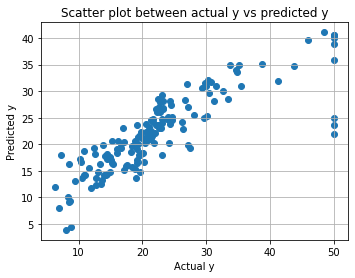

Mean Squared Error : 29.799109511349826
Intercept from custom GD: [22.60225989]
Weights from SKLearn GD
 [[-0.60011888]
 [ 0.91297468]
 [-0.04260866]
 [ 0.67407719]
 [-1.52434307]
 [ 2.76124023]
 [-0.34118062]
 [-2.82019616]
 [ 2.45148684]
 [-2.35802015]
 [-1.94233246]
 [ 0.95375492]
 [-3.22490658]]


In [ ]:
# GD with optimal learning rate
lr_opt = Linear_Regression()                            # Creating instance of Linear_Regression
lr_opt.fit(X_train, y_train, 0.1)                       # Fitting our data to learn the coeff
y_pred = lr_opt.predict(X_test)                         # Predicting on unseen data (test) based on learnt coeff
intercept, betas = lr_opt.params()                      # Getting parameters of linear regression i.e. intercept and coeff

# Plotting actual vs predicted prices
plt.figure(figsize=(5.5,4))
plt.scatter(y_test,y_pred)
plt.grid()
plt.title('Scatter plot between actual y vs predicted y')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show() 

# Calculating Mean squared error
mse_custom_gd = mean_squared_error(y_test,y_pred)
print('Mean Squared Error :', mse_custom_gd)            # Displaying Mean squared error
print("Intercept from custom GD:", intercept)           # Displaying the intercept
print('Weights from SKLearn GD\n', betas)               # Displaying the coeff

## 7.2 Linear Regression with low learning rate

Max interactions exceeded!


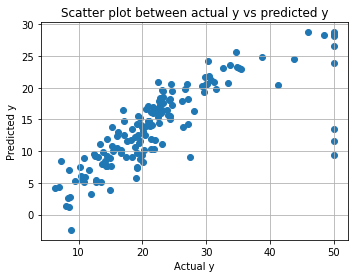

Mean Squared Error : 110.26180107680581
Intercept from custom GD: [14.28776891]
Weights from SKLearn GD
 [[-0.59367458]
 [ 0.46605092]
 [-0.65012751]
 [ 0.76537215]
 [-0.36258655]
 [ 2.47281088]
 [-0.27201958]
 [-0.64771794]
 [-0.07659611]
 [-0.54502299]
 [-1.3618702 ]
 [ 0.69602695]
 [-2.08501101]]


In [ ]:
# GD with low learning rate
lr_low = Linear_Regression()                            # Creating instance of Linear_Regression
lr_low.fit(X_train, y_train, 0.0001)                    # Fitting our data to learn the coeff
y_pred = lr_low.predict(X_test)                         # Predicting on unseen data (test) based on learnt coeff
intercept, betas = lr_low.params()                      # Getting parameters of linear regression i.e. intercept and coeff

# Plotting actual vs predicted prices
plt.figure(figsize=(5.5,4))
plt.scatter(y_test,y_pred)
plt.grid()
plt.title('Scatter plot between actual y vs predicted y')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show() 

# Calculating Mean squared error
mse_custom_gd = mean_squared_error(y_test,y_pred)
print('Mean Squared Error :', mse_custom_gd)            # Displaying Mean squared error
print("Intercept from custom GD:", intercept)           # Displaying the intercept
print('Weights from SKLearn GD\n', betas)               # Displaying the coeff

## 7.3 Linear Regression with high learning rate

Max interactions exceeded!


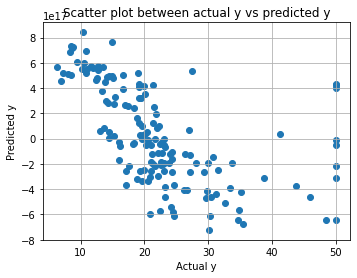

Mean Squared Error : 1.4926537634306276e+35
Intercept from custom GD: [-6.38457897e+09]
Weights from SKLearn GD
 [[ 4.02234553e+16]
 [-3.84509580e+16]
 [ 5.25739332e+16]
 [-9.25903894e+13]
 [ 5.21669356e+16]
 [-2.84804416e+16]
 [ 4.75757590e+16]
 [-4.84629635e+16]
 [ 4.89262163e+16]
 [ 5.13648419e+16]
 [ 3.06259219e+16]
 [-3.05556164e+16]
 [ 4.67707876e+16]]


In [ ]:
# GD with high learning rate
lr_high = Linear_Regression()                            # Creating instance of Linear_Regression
lr_high.fit(X_train, y_train, 8, max_iter=10)            # Fitting our data to learn the coeff
y_pred = lr_high.predict(X_test)                         # Predicting on unseen data (test) based on learnt coeff
intercept, betas = lr_high.params()                      # Getting parameters of linear regression i.e. intercept and coeff

# Plotting actual vs predicted prices
plt.figure(figsize=(5.5,4))
plt.scatter(y_test,y_pred)
plt.grid()
plt.title('Scatter plot between actual y vs predicted y')
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.show() 

# Calculating Mean squared error
mse_custom_gd = mean_squared_error(y_test,y_pred)
print('Mean Squared Error :', mse_custom_gd)            # Displaying Mean squared error
print("Intercept from custom GD:", intercept)           # Displaying the intercept
print('Weights from SKLearn GD\n', betas)               # Displaying the coeff

##7.4 Cost visulaisation for all the above 3 cases

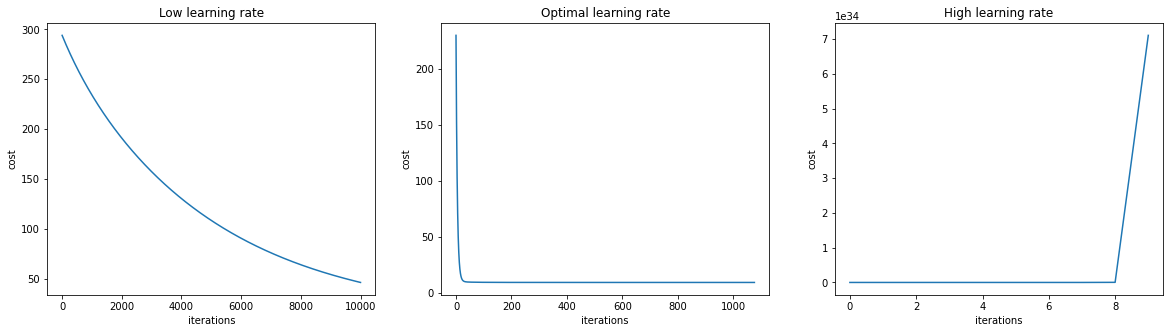

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.plot(lr_low.allcost)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Low learning rate")
plt.subplot(1,3,2)
plt.plot(lr_opt.allcost)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Optimal learning rate")
plt.subplot(1,3,3)
plt.plot(lr_high.allcost)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("High learning rate")
plt.show()

# 8. Disadvantages of Gradient Descent
1. If dataset size is large then Gradient Descent may take longer time to converge and we will also need more memory to fit all the data for computation. Since, Gradient descent needs all the samples to compute derivative. In order to avoid tha, we have 2 flavours of Gradient Descent.
    * **Stochastic Gradient Descent:**SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.
    * **Mini Batch Gradient Descent:**Mini Batch GD randomly picks subset of data point from the whole data set at each iteration to reduce the computations enormously.
2. Gradient descent may fail to find the global minima.<br>
![Gradient descent](https://www.researchgate.net/profile/Md_Saiful_Islam14/publication/338621083/figure/fig4/AS:847811214069760@1579145353037/Gradient-Descent-Stuck-at-Local-Minima-18.ppm)

Source: Researchgate
<br>
It totally depends upon how we initialise the weights and the learning rate.